# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement-1 Linear Regression

<font color=darkblue>You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Dictionary:

![alt text](Data-Dictionary.png)

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1	Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns 
from pandas_profiling import ProfileReport

# For Visualisation
# importing ploting libraries
import matplotlib.pyplot as plt
# import matplotlib.style
# plt.style.use('classic')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid',
        font_scale = 1.5, color_codes=True)

# To Scale our data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#To Split data
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

#Performance metric
from sklearn import metrics

#To check Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read Data
cubic_df = pd.read_csv('cubic_zirconia.csv')

In [3]:
# Check head of the data
cubic_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# Drop Unwanted column from the dataset
cubic_df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Check head of the data
cubic_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [6]:
# Check tail of the data
cubic_df.tail(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
26957,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [7]:
# To generate Report assign it to new variable
profile = ProfileReport(cubic_df,title='Cubic Zerconia',explorative=True)

In [8]:
# To save the report.
profile.to_file('cubic.html')

In [9]:
# Data Inspection (Dimension)
row, col = cubic_df.shape
print("There are total {}".format(row), "Observations and {}".format(col), "variables in the dataset")

There are total 26967 Observations and 10 variables in the dataset


In [10]:
# Data Structure
cubic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
cubic_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

* **From the given dataset we have 9 Independent Variables and one Dependent/Target Variable** 
* **Out of 9 independent variables, we have 7 continuous variables and 3 categorical variables**
* **depth variable contains few missing values** 
* **The dataset contains 7 float, 3 objects and one int datatype.**

In [12]:
# Number Summary
round(cubic_df.describe(include='all'),5)

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.00000,26967,26967,26967,26270.00000,26967.00000,26967.00000,26967.00000,26967.00000,26967.00000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79838,NaN,NaN,NaN,61.74515,57.45608,5.72985,5.73357,3.53806,3939.51811
std,0.47775,NaN,NaN,NaN,1.41286,2.23207,1.12852,1.16606,0.72062,4024.86467
min,0.20000,NaN,NaN,NaN,50.80000,49.00000,0.00000,0.00000,0.00000,326.00000
25%,0.40000,NaN,NaN,NaN,61.00000,56.00000,4.71000,4.71000,2.90000,945.00000
50%,0.70000,NaN,NaN,NaN,61.80000,57.00000,5.69000,5.71000,3.52000,2375.00000
75%,1.05000,NaN,NaN,NaN,62.50000,59.00000,6.55000,6.54000,4.04000,5360.00000


In [13]:
#skewness of the data
cubic_df.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

* **The variables carat,y,z and price is greater than 1,the data are highly skewed.**
* **The variable depth and x is between -0.5 and 0.5,the data are fairly symmetrical.**
* **The variable table is between 0.5 and 1,the data is moderately skewed.**

In [14]:
# Check for Missing Values
cubic_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

* **depth has 697 (2.6%) missing values**

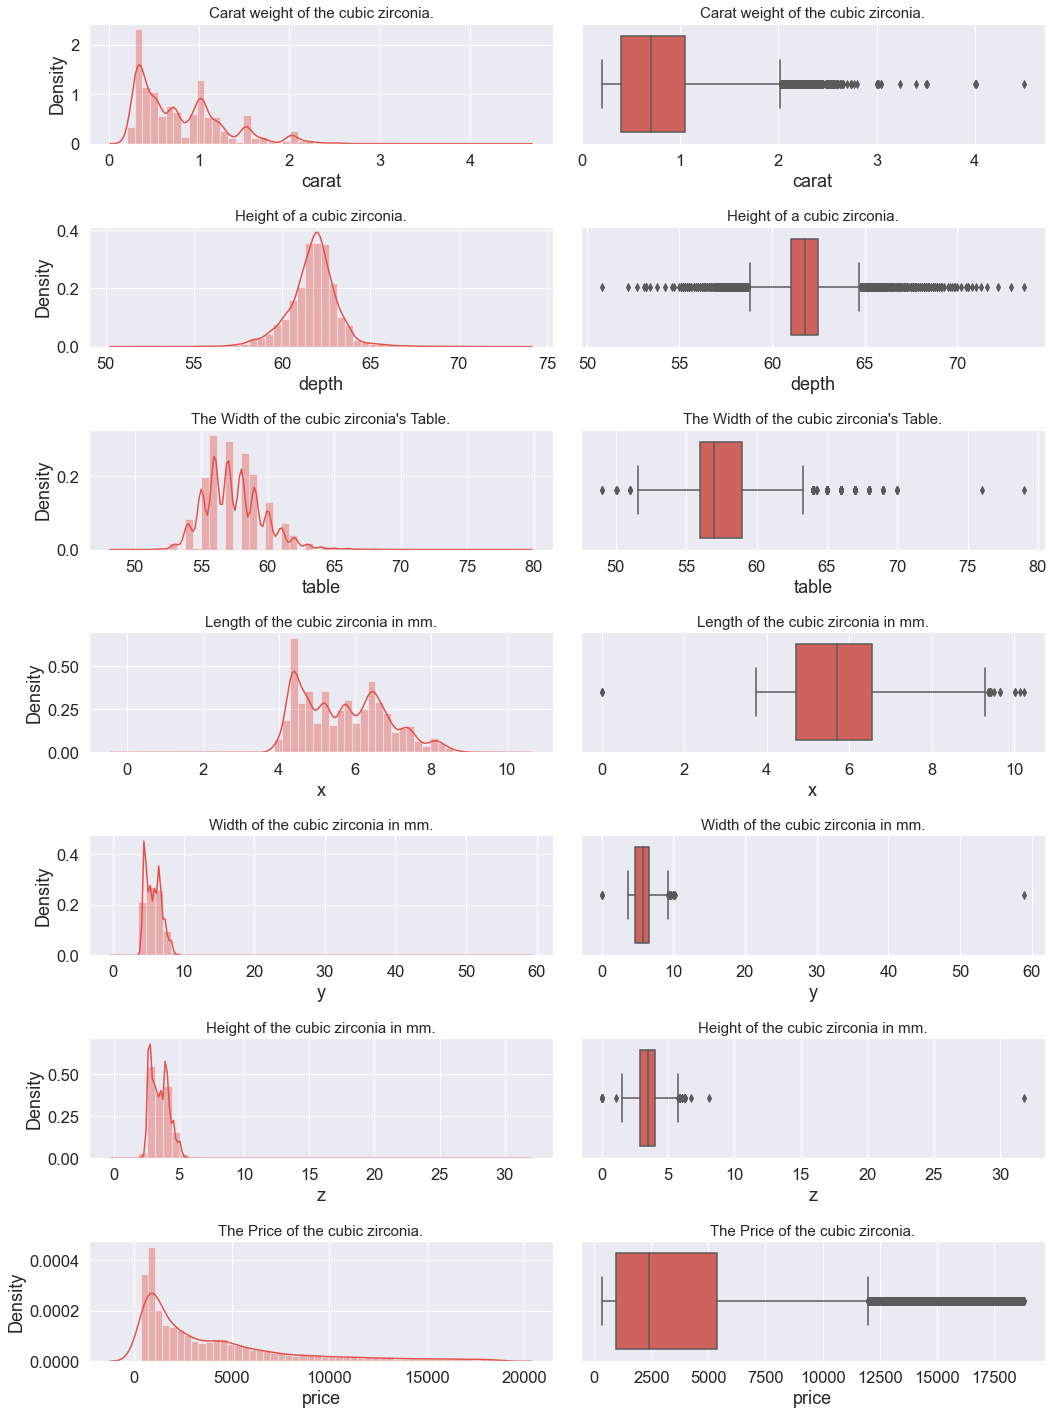

In [15]:
## Univariate Analysis using Histplot and Boxplot:
## Identify outliers for a given dataset:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15, 20)

a = sns.distplot(cubic_df['carat'] , ax=axes[0][0])
a.set_title("Carat weight of the cubic zirconia.",fontsize=15)

a = sns.boxplot(cubic_df['carat'] , ax=axes[0][1])
a.set_title("Carat weight of the cubic zirconia.",fontsize=15)

a = sns.distplot(cubic_df['depth'] , ax=axes[1][0])
a.set_title("Height of a cubic zirconia.",fontsize=15)

a = sns.boxplot(cubic_df['depth'] , ax=axes[1][1])
a.set_title("Height of a cubic zirconia.",fontsize=15)

a = sns.distplot(cubic_df['table'] , ax=axes[2][0])
a.set_title("The Width of the cubic zirconia's Table.",fontsize=15)

a = sns.boxplot(cubic_df['table'] , ax=axes[2][1])
a.set_title("The Width of the cubic zirconia's Table.",fontsize=15)

a = sns.distplot(cubic_df['x'] , ax=axes[3][0])
a.set_title("Length of the cubic zirconia in mm.",fontsize=15)

a = sns.boxplot(cubic_df['x'] , ax=axes[3][1])
a.set_title("Length of the cubic zirconia in mm.",fontsize=15)

a = sns.distplot(cubic_df['y'] , ax=axes[4][0])
a.set_title("Width of the cubic zirconia in mm.",fontsize=15)

a = sns.boxplot(cubic_df['y'] , ax=axes[4][1])
a.set_title("Width of the cubic zirconia in mm.",fontsize=15)

a = sns.distplot(cubic_df['z'] , ax=axes[5][0])
a.set_title("Height of the cubic zirconia in mm.",fontsize=15)

a = sns.boxplot(cubic_df['z'] , ax=axes[5][1])
a.set_title("Height of the cubic zirconia in mm.",fontsize=15)

a = sns.distplot(cubic_df['price'] , ax=axes[6][0])
a.set_title("The Price of the cubic zirconia.",fontsize=15)

a = sns.boxplot(cubic_df['price'] , ax=axes[6][1])
a.set_title("The Price of the cubic zirconia.",fontsize=15)

plt.tight_layout()
plt.show()

* **We have outliers present for all continuous variables**.
* **Carat and depth has a huge number of outliers present.**

In [16]:
# Geting unique counts of all Categorical Variables
for column in cubic_df[['cut','color','clarity']]:
    print(column.upper(),': ',cubic_df[column].nunique())
    print(cubic_df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




* **Cut is of ordinal datatype with 5 category: Fair,Good,Very Good,Premium,Ideal.**
* **Color is of ordinal datatype with 7 category: D,E,F,G,H,I,J with D being the best and j being the worst.**
* **Clarity is of ordinal datatype with 8 category: FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.(In order from Best to Worst, FL = flawless, I3= level 3 inclusions).** 

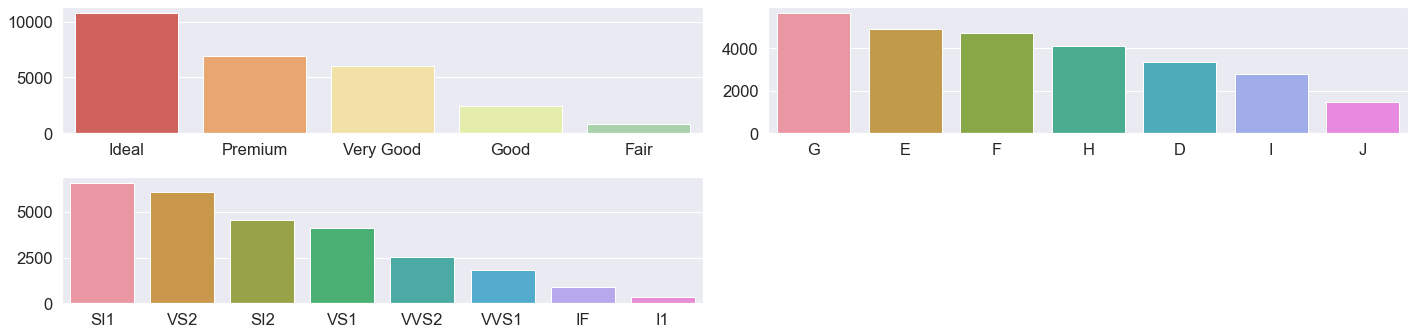

In [17]:
## Plot the Class count for each Nominal variable
## construct barplot for Nominal variables:

catg_plot=cubic_df[['cut','color','clarity']]
fig=plt.figure(figsize=(20,5))
for i in range(0,len(catg_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.barplot(catg_plot[catg_plot.columns[i]].value_counts().index,catg_plot[catg_plot.columns[i]].value_counts().values)
    plt.tight_layout()

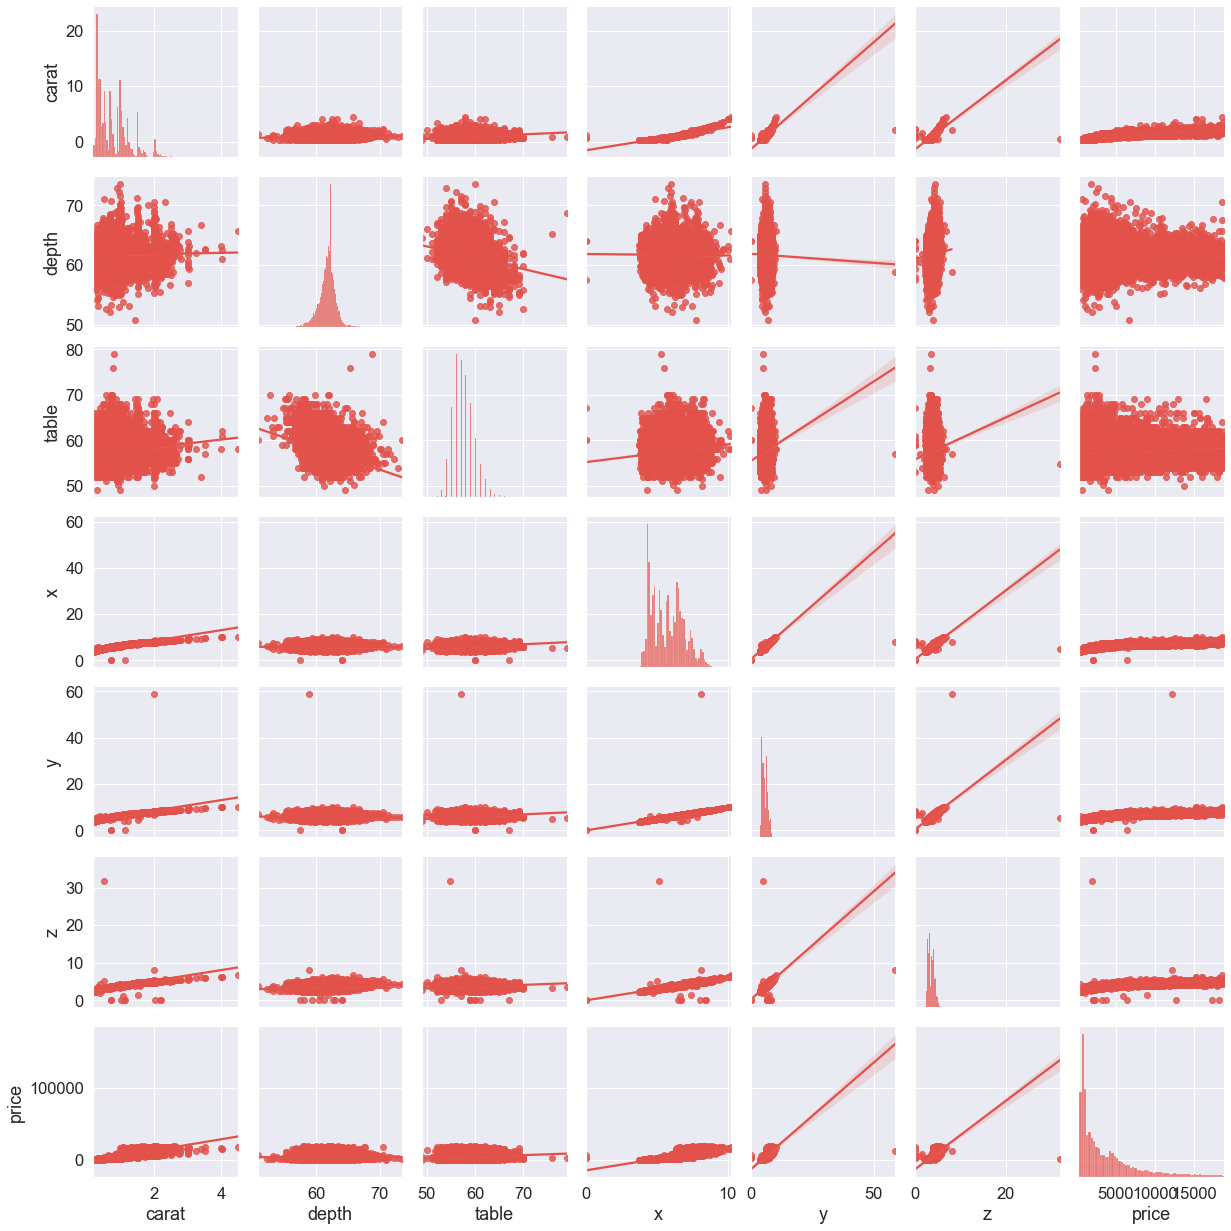

In [18]:
# Multivariate Analysis using Scatterplot:
sns.pairplot(data=cubic_df[['carat','depth','table','x','y','z','price']], kind='reg');

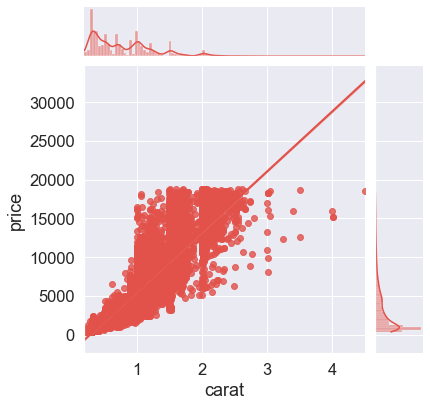

In [19]:
# Correlation between Independent and target variable:
g = sns.JointGrid(data=cubic_df, x="carat", y="price")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

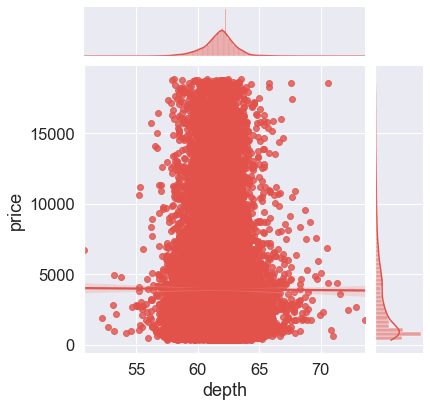

In [20]:
g = sns.JointGrid(data=cubic_df, x="depth", y="price")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

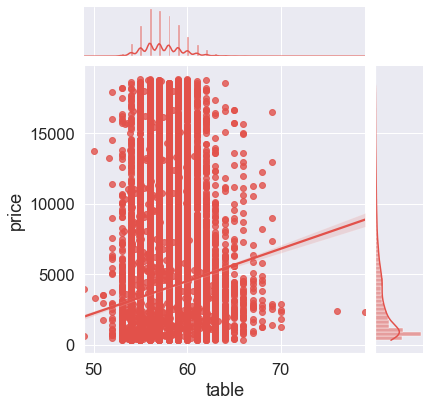

In [21]:
g = sns.JointGrid(data=cubic_df, x="table", y="price")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


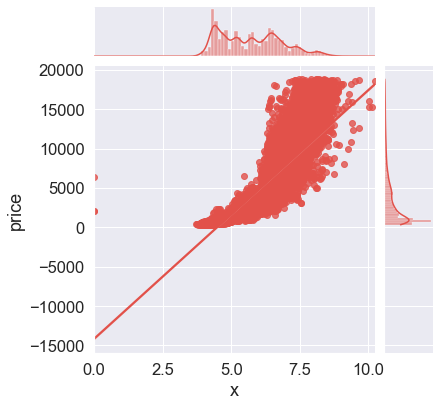

In [22]:
g = sns.JointGrid(data=cubic_df, x="x", y="price")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


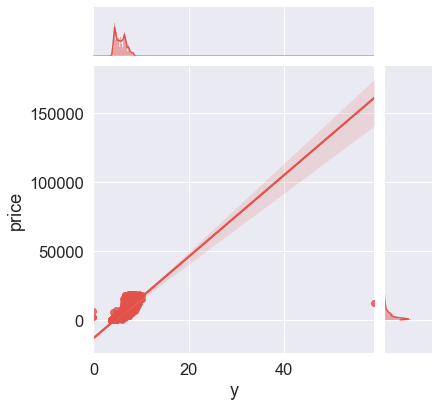

In [23]:
g = sns.JointGrid(data=cubic_df, x="y", y="price")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


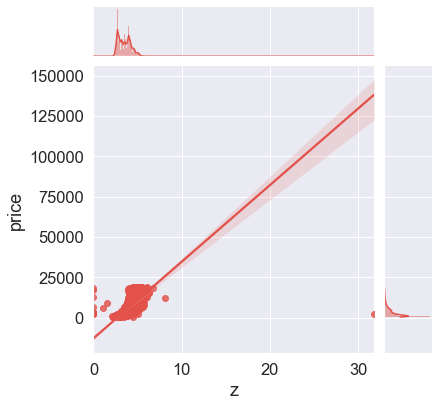

In [24]:
g = sns.JointGrid(data=cubic_df, x="z", y="price")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


<AxesSubplot:>

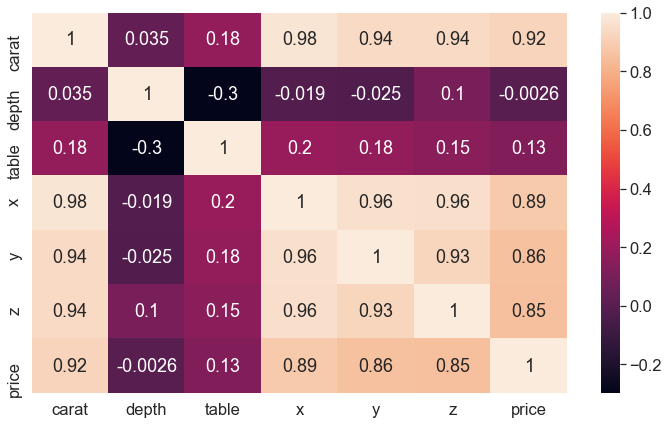

In [25]:
X=cubic_df.drop(['cut','color','clarity'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

* **x is highly correlated with carat,y and z**
* **carat is highly correlated with x,y,z and price** 
* **y is highly correlated with carat,x and z** 
* **z is highly correlated with carat,x and y**
* **price is highly correlated with carat**

* **from the above we could conclude that multicolinearity exist among the independent variables**

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2	Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [26]:
#Display values equal to zero
zeros = (cubic_df == 0).any(axis=1)
zero_df = cubic_df.loc[zeros]
zero_df

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


* **x,y and z represent lenght,width and height of a cubic zerconia.**
* **for a shape of a diamond value of x,y and z having zero  is meaningless.**
* **Convert all the zeros to missing values.**

In [27]:
cubic_df.isin([0]).sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          9
price      0
dtype: int64

In [28]:
cubic_df = cubic_df.replace(0, np.nan)

In [29]:
cubic_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            3
y            3
z            9
price        0
dtype: int64

In [30]:
cubic_df.isnull().sum().sum()/26967*100

2.6402640264026402

* **Since the missing values are less than 3% we can remove them from the original dataset.**

In [31]:
# Drop missing values
cubic_df = cubic_df.dropna()
cubic_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Outlier Treatment**

Shape before Outliers Treatment (26261, 10)


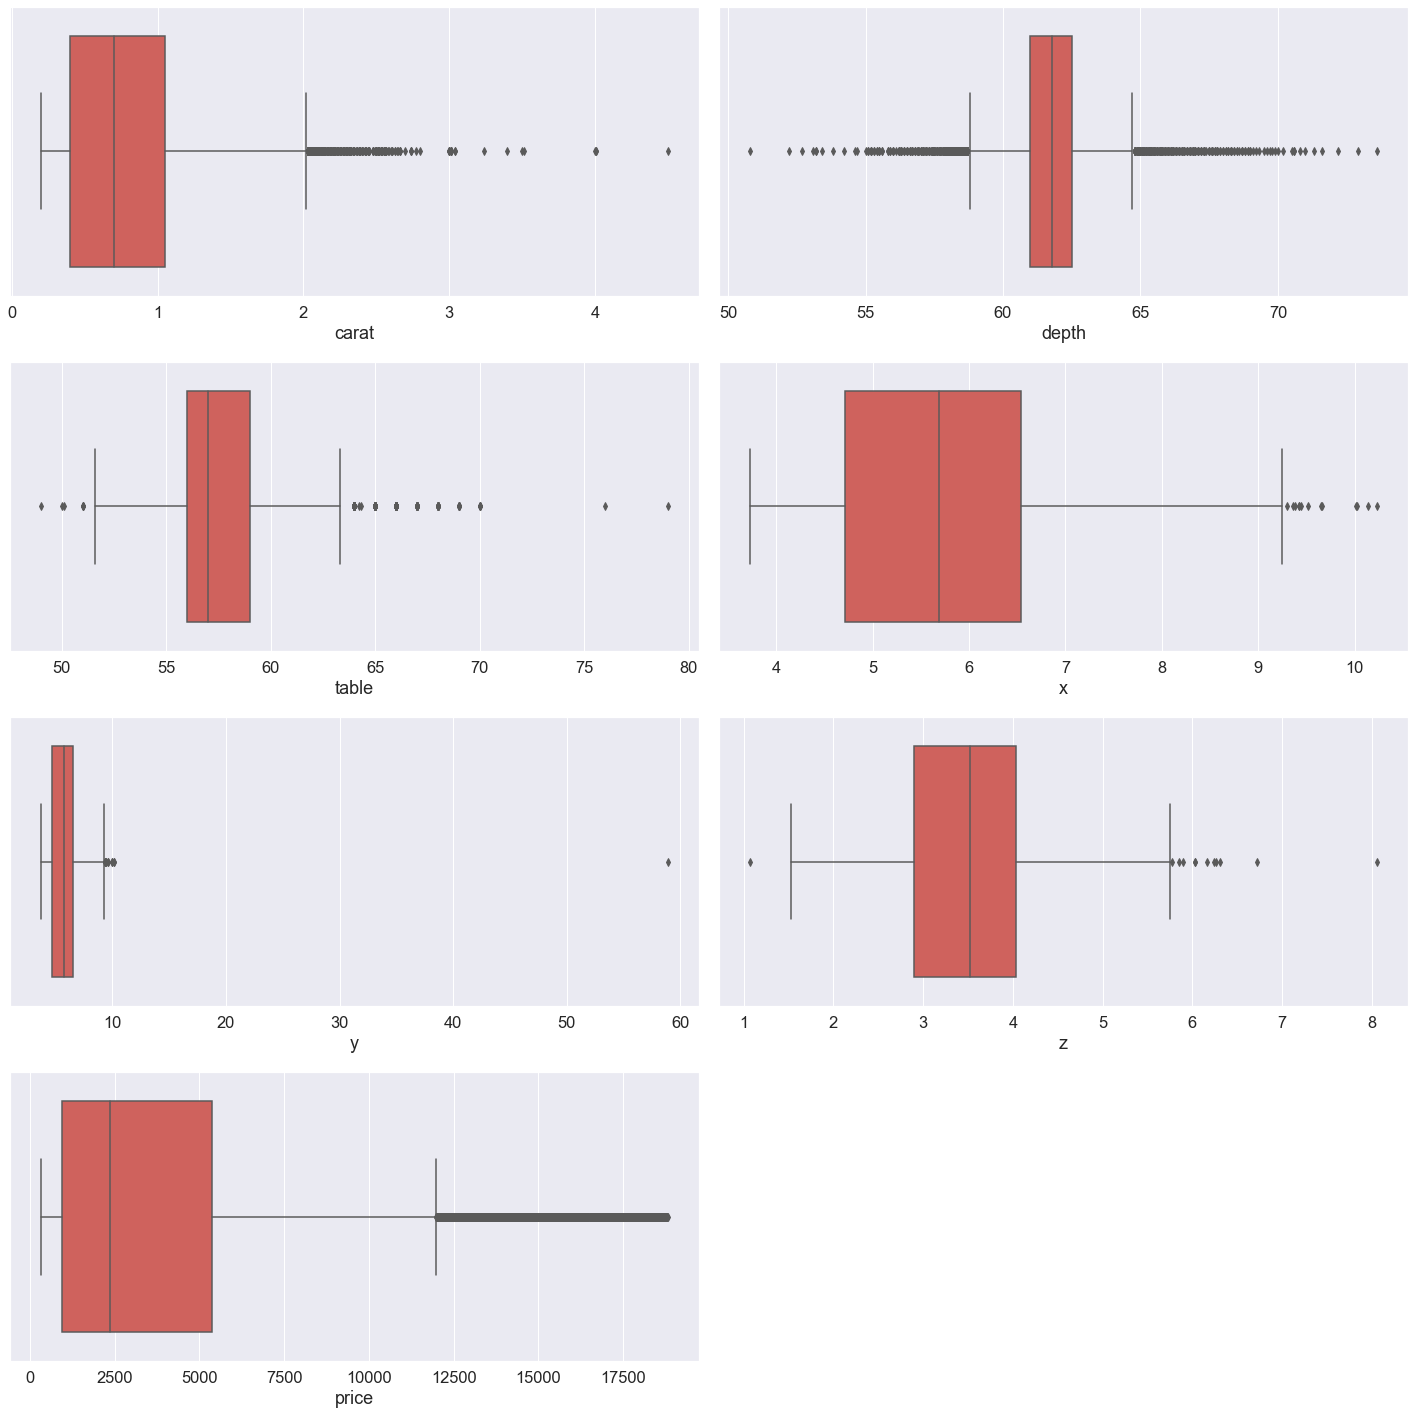

In [32]:
data_plot=cubic_df[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cubic_df.shape)

In [33]:
col = cubic_df[['carat','depth','table','x','y','z','price']]

def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    LL = Q1 - (1.5*IQR)
    UL = Q3 + (1.5*IQR)
    return LL, UL

In [34]:
for i in col:
    ll, up = remove_outlier(cubic_df[i])
    cubic_df[i] = np.where(cubic_df[i] > up, up, cubic_df[i])
    cubic_df[i] = np.where(cubic_df[i] < ll, ll, cubic_df[i])

Shape After Outliers Treatment (26261, 10)


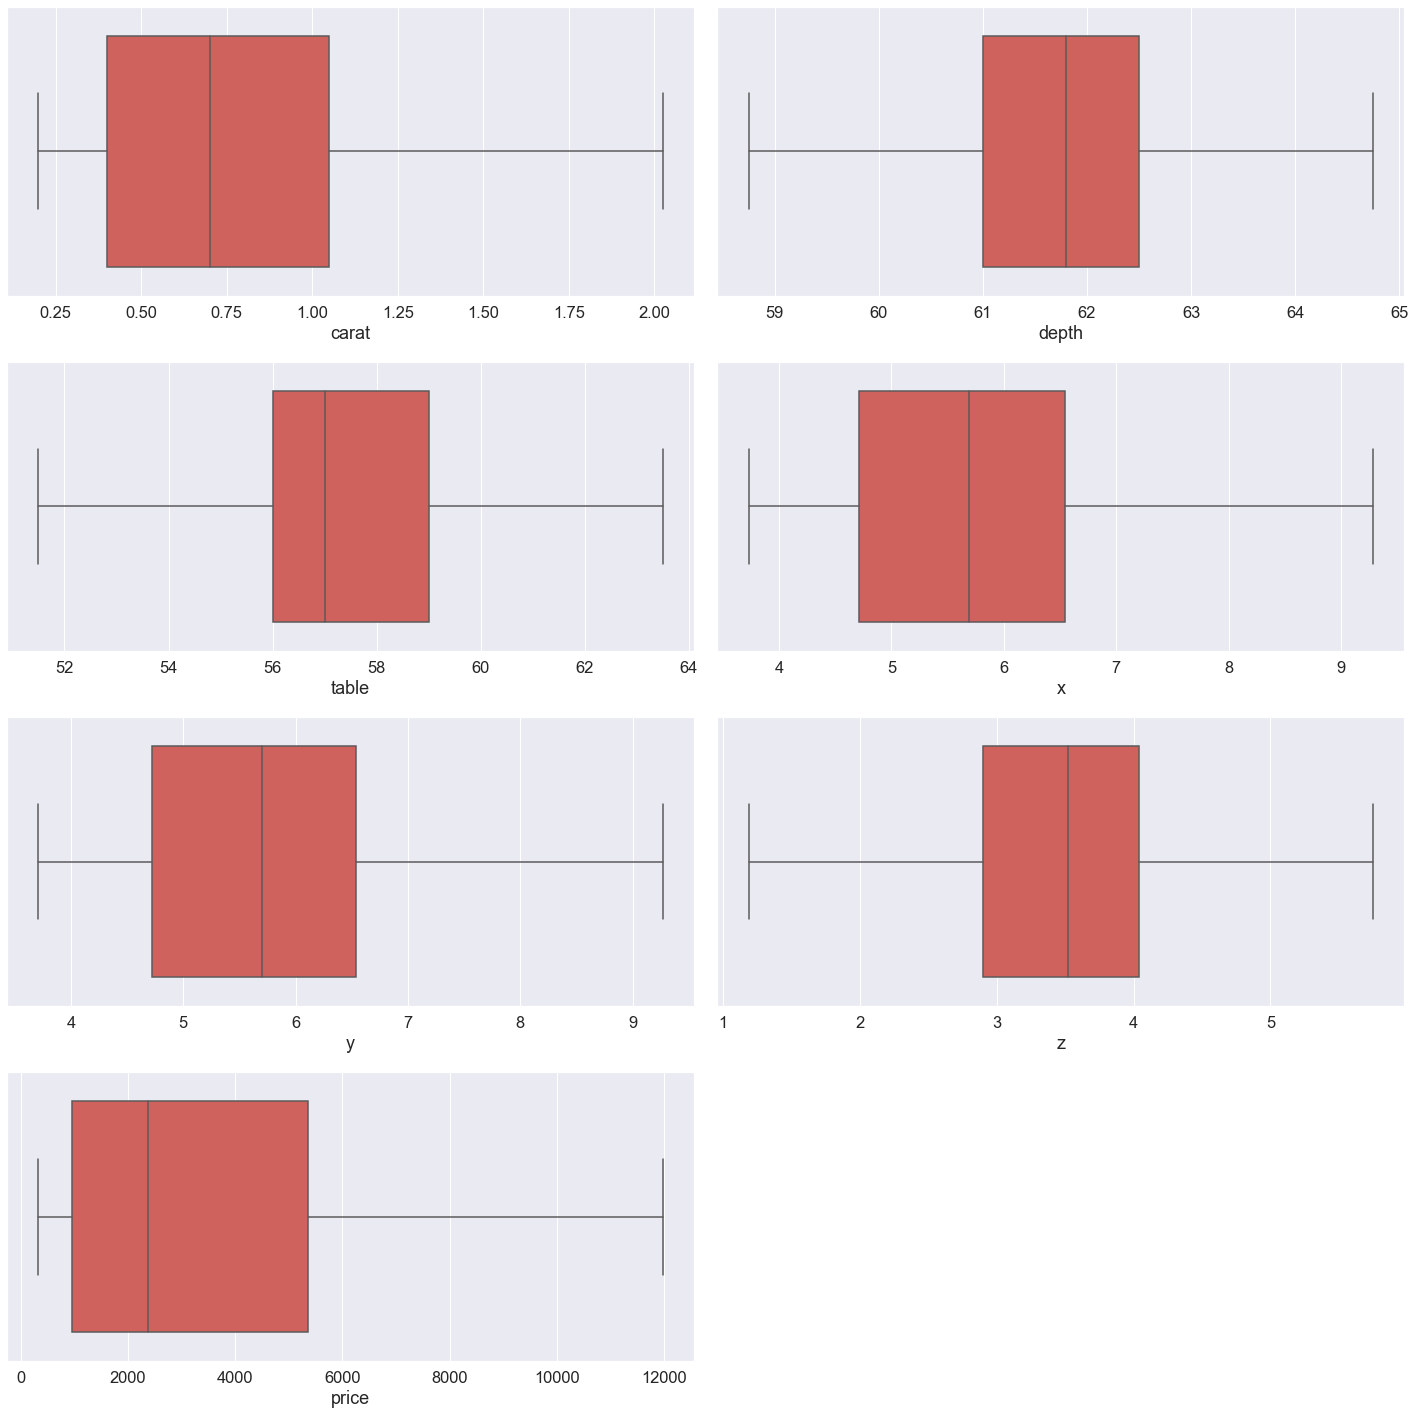

In [35]:
data_plot=cubic_df[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape After Outliers Treatment',cubic_df.shape)

* **In regression, it is better to centre the variables so that the predictors have mean 0. This makes it easier to interpret the intercept term as the expected value of Yi when the predictor values are set to their means. Otherwise, the intercept is interpreted as the expected value of Yi when the predictors are set to 0, which may not be a realistic or interpretable situation.**
* **Also, we have feature with different unit weight of cubic measured in carat whereas length or width measured in mm.**


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3	Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE?

**Encode the Data**

* **Convert categorical variable 'cut' into dummy variables using One hot encoding and the remaining two 'color' and 'clarity' category can be converted using pd.categories to avoid higher dimensionality.**


In [36]:
cubic_df = pd.get_dummies(cubic_df, columns=['cut'])

In [37]:
cubic_df.rename(columns={'cut_Very Good':'cut_Very_Good'}, inplace=True)

In [38]:
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in cubic_df.columns: 
    if cubic_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(cubic_df[feature].unique()))
        print(pd.Categorical(cubic_df[feature].unique()).codes)
        cubic_df[feature] = pd.Categorical(cubic_df[feature]).codes



feature: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


feature: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


In [39]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = cubic_df.drop('price', axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = cubic_df[['price']]

In [40]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=27)

In [41]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (18382, 13)
Number of rows and columns of the training set for the dependent variable: (18382, 1)
Number of rows and columns of the test set for the independent variables: (7879, 13)
Number of rows and columns of the test set for the dependent variable: (7879, 1)


**Build model using Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

**Before scaling data**

In [42]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()

In [43]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9305.030130375635
The coefficient for color is -226.90056110618627
The coefficient for clarity is 239.11467724683274
The coefficient for depth is 3.3424603361755265
The coefficient for table is -32.96115023521669
The coefficient for x is -1677.8771671728953
The coefficient for y is 1525.2860052518943
The coefficient for z is -917.0197363313135
The coefficient for cut_Fair is -562.3575327065515
The coefficient for cut_Good is -48.53211478120936
The coefficient for cut_Ideal is 316.2707706870597
The coefficient for cut_Premium is 182.95218574614586
The coefficient for cut_Very_Good is 111.66669105454564


In [45]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1653.4276107906048


In [46]:
# For Training set
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
score_train = regression_model.score(X_train, y_train)
score_train

0.9115729329554999

In [47]:
#RMSE on Training data
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_train)-y_train)**2)

# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math

rmse_train = math.sqrt(mse)
rmse_train

1026.008047153136

In [48]:
# For Testing set
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
score_test = regression_model.score(X_test, y_test)
score_test

0.9098524520247935

In [49]:
# RMSE on Testing set
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math

rmse_test = math.sqrt(mse)
rmse_test

1052.632064106806

In [50]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

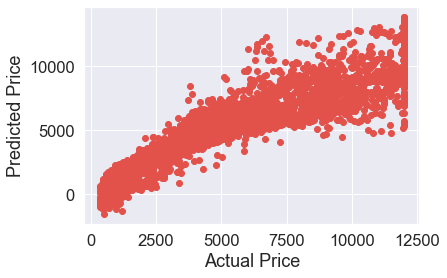

In [51]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values

plt.scatter(y_test['price'], y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

**After Scaling data**

In [52]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [53]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [54]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.241155382417389
The coefficient for color is -0.11173293252334582
The coefficient for clarity is 0.11967342620149482
The coefficient for depth is 0.00121966495754702
The coefficient for table is -0.020689067653729715
The coefficient for x is -0.5462796701168283
The coefficient for y is 0.4930959806987278
The coefficient for z is -0.1843302445999642
The coefficient for cut_Fair is -0.03404693578417074
The coefficient for cut_Good is -0.01701516951930478
The coefficient for cut_Ideal is 0.022826480193777494
The coefficient for cut_Premium is 0.003445699948725065
The coefficient for cut_Very_Good is -0.005327947228240204


In [55]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.3064972639488146e-16


In [56]:
# For Training Dataset:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

score_scaled_train = regression_model.score(X_train_scaled, y_train_scaled)
score_scaled_train

0.9115729329554999

In [57]:
# RMSE on Training Dataset:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

rmse_scaled_train = math.sqrt(mse)
rmse_scaled_train

0.2973668896237444

In [58]:
# For Testing Dataset:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

score_scaled_test = regression_model.score(X_test_scaled, y_test_scaled)
score_scaled_test

0.9098299657942147

In [59]:
# RMSE on Testing Dataset:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

rmse_scaled_test = math.sqrt(mse)
rmse_scaled_test

0.3002832566191216

In [60]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

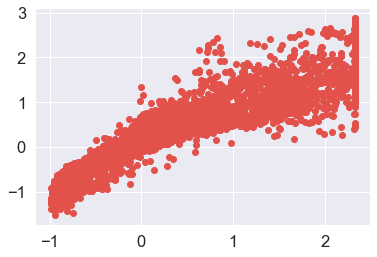

In [61]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [62]:
pd.DataFrame({'Train RMSE': [rmse_train,rmse_scaled_train],
              'Test RMSE': [rmse_test,rmse_scaled_test],
              'Training Score':[score_train,score_scaled_train],
              'Test Score': [score_test,score_scaled_test]},
             index=['Linear Regression','Scaled Linear Regression']
            )

,Train RMSE,Test RMSE,Training Score,Test Score
Linear Regression,1026.008047,1052.632064,0.911573,0.909852
Scaled Linear Regression,0.297367,0.300283,0.911573,0.909830


**The final Linear Regression equation is:**  

<b>price = (1653.42) * Intercept + (9305.04) * carat + (-226.90) * color + (239.12) * clarity + (3.35) * depth + (-32.97) * table + (-1677.88) * x + (1525.28) * y + (-917.02) * z + (-562.36) * cut_Fair + (-48.54) * cut_Good + (316.28) * cut_Ideal +(182.95) * cut_Premium + (111.67) * cut_Very_Good </b>  
  
* **When carat increases by 1 unit, price increases by 9305.04 units, keeping all other predictors constant.**  

**When cut quality is:<br/>
fair, price decreases by -562.36,<br/>
Good, price decreases by -48.54,<br/>
Very_Good  price increases by 111.67<br/>
premium, price increases by 182.95<br/>
Ideal, price increases by 316.28<br/>
So, as the quality of the cubic zerconia is varied from fair to Ideal quality, price also increases.** 

* **When y,height of the cubic increases by 1 unit, price increases by 1525.28 units, keeping all other predictors constant.**

**Check Multi-collinearity using VIF**

* **After several iterative process using VIF technique, find out the best important attributes which holds good for linear regression maodel.**

In [63]:
X = X.drop({'depth','table','x','cut_Ideal','z','y'},axis=1)

In [64]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [65]:
i=0
for column in X.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 3.6773673273394603
color ---> 3.37744981928417
clarity ---> 2.8684793717645363
cut_Fair ---> 1.0809553040342552
cut_Good ---> 1.18964360503517
cut_Premium ---> 1.578520020707355
cut_Very_Good ---> 1.4759636465422865


In [66]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [67]:
data_train = pd.concat([X_train,y_train], axis=1)
data_train.head()

,carat,color,clarity,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,price
12140,0.28,1,4,62.8,60.0,4.16,4.21,2.63,0,0,0,0,1,434.0
14317,1.50,3,4,62.3,57.0,7.25,7.32,4.54,0,0,1,0,0,11980.0
15571,0.50,1,5,61.3,57.0,5.13,5.15,3.15,0,0,1,0,0,1624.0
21093,1.01,2,7,63.6,60.0,6.31,6.36,4.03,0,1,0,0,0,6932.0
1891,1.12,3,2,60.1,58.0,6.78,6.83,4.09,0,0,0,1,0,5233.0


In [68]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+color+clarity+cut_Fair+cut_Good+cut_Very_Good+cut_Premium', data = data_train).fit()
lm1.params

Intercept       -2438.851235
carat            7552.657776
color            -221.359966
clarity           250.031831
cut_Fair        -1142.030067
cut_Good         -466.076220
cut_Very_Good    -240.474569
cut_Premium      -271.686346
dtype: float64

In [69]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.620e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:31:57   Log-Likelihood:            -1.5380e+05
No. Observations:               18382   AIC:                         3.076e+05
Df Residuals:                   18374   BIC:                         3.077e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2438.8512     28.021    -87.035

**The Linear Regression equation for best attributes is:**  

<b>price = (-2438.85) * Intercept + (7552.65) * carat + (-221.36) * color + (250.04) * clarity + (-1142) * cut_Fair + (-466.08) * cut_Good + (-271.68) * cut_Premium + (-240.48) * cut_Very_Good </b>  
  
* **When carat increases by 1 unit, price increases by 7552.65 units, keeping all other predictors constant.**  

* **When cut quality of the cubic zirconia is varied from fair to Ideal quality, price also increases.** 

* **For any category of Clarity of the cubic , price increases by 250.04 units, keeping all other predictors constant.**

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4	Inference: Basis on these predictions, what are the business insights and recommendations.

**Recommendations and Business Insights:**
* **Overall, from the model we can recommend company to drop variables such as depth and table has they are weak predictors and has no impact on the predictions.**
* **We also noticed that, weight and length of the cubic zirconia has a very strong co-relation, which in turns lead to multicollinearity problem. Hence any of them will not be a useful for predictions.**
* **Carat-weight of the cubic zirconia becomes one the most important feature for getting profitable sales of cubic zirconia also any clarity of the cubic zirconia gives profitable returns to the company.**
* **Although, the different variety of cut quality varied from fair to Ideal reduces loss, company still need to look into this particular variable.** 

